(superposicion)=
# Introducción
```{index} qubit, Dirac (notación), bra-ket (notación), ket
```

La informática clásica se basa en la noción de bit como la unidad primaria de la información. Esta concepción de unidad básica de información se denomina *qubit* en programación cuántica. Aunque esto puede variar, los dos qubits más utilizado son $|0\rangle$ y $|1\rangle$, los cuales forman lo que se denomina una base (similar a lo que ocurre en una base de un espacio vectorial). La notación anterior es la normalmente utilizada dentro de la programación cuántica y se denominación notación de *Dirac*, y los elementos que la componen son los *bra-ket*. Como se puede observar los dígitos 0 y 1 están encerrados entre una barra vertical y una escuadra angular, denominada *Ket*.

```{index} Bloch sphere, esfera de Bloch
```

Para visualizar los estados dentro del mundo cuántico, se utiliza la denominada *esfera de Bloch (Bloch sphere)*. Esta esfera tienen la característica principal de que tiene radio 1, y entonces los qubits  anteriormente referenciados se representan en la misma según la figura que sigue, que como se puede observar están situados en el polo norte y polo sur de dicha esfera.

![](images/Bloch_0_1.PNG)

Más adelante se verá cómo poder representar este tipo de información utilizando <a href="https://qiskit.org/" target="_blank"> la herramienta qiskit </a>, ampliamente utilizada para el desarrollo de la programación cuántica.

Como puede verse en la figura anterior, y si utilizamos coordenadas cartesianas, el qubit $|0\rangle$ quedaría representado por el siguiente trío de valores: (0,0,1), mientras que el elemento $|1\rangle$ sería equivalente a (0,0,-1).

## Superposición de estados.

En el aparatado anterior, se han presentado dos qubits que pueden ser asimilados a los bits de la programación clásica. Pero sin embargo en la programación cuántica se establece el concepto de superposición de estados, que no es más que una combinación líneal de elementos de una base. De esta manera posemos poner en estado de superposición los dos elementos anteriores generando un nuevo qubit, de la siguiente manera:

$$|\gamma\rangle=\alpha \cdot |0\rangle +  \beta \cdot |1\rangle$$

De tal manera que $\alpha$ y $\beta$ serían números complejos y además para que el valor obtenido quede dentro de la esfera unidad deberán cumplir que $\alpha^2 + \beta^2=1$.

Por lo tanto uno de los muchos estados que podemos obtener de esta manera podría ser el siguiente:

$$\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$$

que verifica lo siguiente, dada la construcción que se ha hecho del mismo: puesto que los coeficientes utilizados son los mismos, debería estar a la misma distancia de los elementos $|0\rangle$ y $|1\rangle$, es decir debería estar equidistante del polo norte y del sur y por lo tanto los puntos de la esfera unidad que verifican esta propiedad son todos los que están en el ecuador de la esfera de Bloch. En concreto ese punto sería el que se representa en la siguiente figura:


![](images/Bloch_1_0_0.PNG)

En coordenadas cartesianas, este punto sería el (1,0,0).

A pesar de que en estos momentos el lector no entienda bien el código que se le va a presentar, se ha creído útil hacerlo, de cara a la representación de estos estados superpuestos utilizando quiskit. Para ello simplemente decir que existen tres formas de representar los elementos de la esfera de Bloch:

* Mediante coordenadas polares

* Mediante coordenadas cartesianas

* utilizando la nomenclatura que se ha utilizado anteriormente.
```{index} plot_bloch_vector
```


Teniendo en cuenta lo anterior, cabe decir que quiskit tiene la clase denominada <a href="https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_vector.html" target="_blank"> *plot_bloch_vector* </a> que permite hacer estas representaciones gráficas sobre la esfera de Bloch. Pero como puede verse en su documentación los tipos de coordenadas que admiten son las de tipo cartesiano y la de coordenadas polares. Por lo tanto se deben hacer una serie de transformaciones para que un qubit expresado de la tercera forma (que es la que se ha visto hasta la fecha), se pueda representar con esta clase. Para ello lo que hacemos es pasar ese tipo de coordenadas a polares y después utilizar esta clase de python.

Observar que previamente a ejecutar el siguiente código, lo que tenemos que tener es descargadas las librerías de numpy y qiskit. Esto lo haríamos con el siguiente código (descomentarlo si se quiere reutilizar).


In [1]:
#!pip install qiskit
#pip install numpy

Ahora ya podríamos generar el código necesario. Se aconseja al lector <a href="https://quantumcomputing.stackexchange.com/questions/26431/can-i-convert-a-qubit-in-complex-form-to-polar-form" target="_blank"> ir a este enlace </a> para entender mejor lo que se está haciendo, aunque como ya se ha dicho antes no es necesario entenderlo para seguir hacia adelante con el resto de la materia (no obstante, más adelante, en el apartado [específico de la esfera de Bloch](mapeo) se explica mejor esta forma de proceder).

Importamos inicialmente la librerías necesarias

In [2]:
import math, cmath
import numpy as np


A continuación vamos a definir los dos números complejos del estado superpuesto siguiente:
$$\frac{1}{\sqrt{2}}|0\rangle+\frac{1}{\sqrt{2}}|1\rangle$$

Es decir con $z_1$ representamos el completo $\frac{1}{\sqrt{2}}+0i$ y con $z_2$ el mismo complejo.

In [3]:
z1=complex(1/np.sqrt(2),0)
z2=complex(1/np.sqrt(2),0)

A continuación pasamos a coordenadas polares el punto que representan en la esfera de Bloch, de la siguiente manera

In [4]:
r1, phi1 = cmath.polar(z1)
r2, phi2 = cmath.polar(z2)

theta = 2 * math.acos(r1)
phi = phi2 - phi1

print('θ =', theta)
print('φ =', phi)

θ = 1.5707963267948968
φ = 0.0


Con la información anterior, ya podemos hacer la representación gráfica del qubit sobre el que estamos trabajando

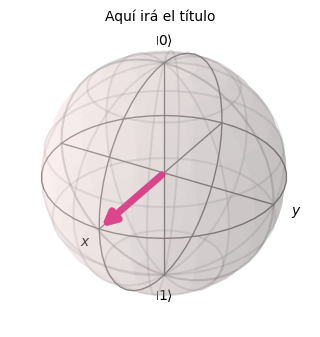

In [5]:
import numpy as np
from qiskit.visualization import plot_bloch_vector

# You can use spherical coordinates instead of cartesian.

plot_bloch_vector([1, theta, phi], coord_type='spherical',title='Aquí irá el título',figsize=(3,3))

Con la explicación dada anteriormente, ya estamos en condiciones de definir una función en Python que nos obtenga esas coordenadas

In [72]:
def super2polares(z1,z2, titulo="Un título"):
    """
    Función que nos sirve para pasar de unas coordenadas del tercer tipo a coordenadas polares
    
    @parámetros:
    
    z1: Valores del primero número complejo
    
    z2: valores del segundo número complejo
    
    
    @return:
    
    Los valores del theta y phi de las coordenadas esféricas
    """
    
    
    r1, phi1 = cmath.polar(z1)
    r2, phi2 = cmath.polar(z2)

    theta = 2 * math.acos(r1)
    phi = phi2 - phi1

    return theta,phi

Utilizamos la función anterior para hacer la representación gráfica correspondiente sobre la esfera de Bloch

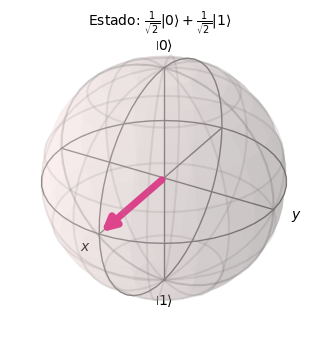

In [73]:
z1=complex(1/np.sqrt(2),0) # primer número
z2=complex(1/np.sqrt(2),0) #segundo número
resul =super2polares(z1,z2) # almacenamos la información en una tupla
# Y ahora ya podemos hacer la representación gráfica
plot_bloch_vector([1, resul[0], resul[1]], coord_type='spherical',
                  title='Estado: $\\frac{1}{\\sqrt{2}}|0\\rangle+\\frac{1}{\\sqrt{2}}|1\\rangle$',figsize=(3,3))

Existen igualmente una serie de estados que tienen una amplia utilización dentro de la programación cuántica, y que además cuentan con una denominación concreta. Estos estados son los siguientes:

* $|+\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$

* $|-\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)$

* $|i\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle+i|1\rangle\right)$

* $|-i\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle-i|1\rangle\right)$

La representación gráfica de estos cuatro estados en la esfera de Bloch, se puede apreciar en la siguiente figura:

![](images/Bloch_importantes.PNG)

Otra forma de representación de los estados cuánticos puede ser por ejemplo la siguiente:$\frac{1}{\sqrt{2}}\left(|0\rangle+e^{i\pi/6}|1\rangle\right)$. Observar que este qubit también se encuentra sobre el ecuador de la esfera de Bloch.

Para familiarizarnos con los números complejos de python, vamos a poner el número complejo $e^{i\pi/6}$ en un formato con el que se pueda operar en python, de la siguiente manera:

In [74]:
print(cmath.exp(complex(0,np.pi/6)))

(0.8660254037844387+0.49999999999999994j)


vamos ahora a ver cómo podemos hacer su representación gráfica en la esfera de Bloch

In [75]:
z1= complex(1/np.sqrt(2),0)
z2 = (1/np.sqrt(2))*cmath.exp(complex(0,np.pi/6))

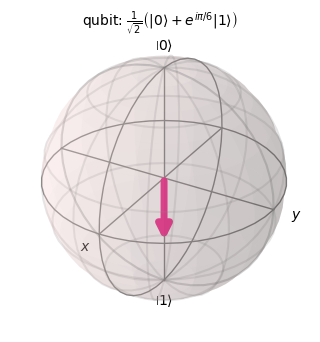

In [76]:
resul =super2polares(z1,z2)
plot_bloch_vector([1, resul[0], resul[1]], coord_type='spherical',
                  title='qubit: $\\frac{1}{\\sqrt{2}}\\left(|0\\rangle+e^{i\\pi/6}|1\\rangle\\right)$',figsize=(3,3))

(puntoesfera)=

Por supuesto existen puntos que no necesariamente están sobre el ecuador de la esfera. Por ejemplo el qubit  $\frac{\sqrt{3}}{2}|0\rangle+\frac{1}{2}|1\rangle$.

Su representación gráfica es la siguiente:

In [77]:
z1=complex(np.sqrt(3)/2,0)
z2=complex(1/2,0)

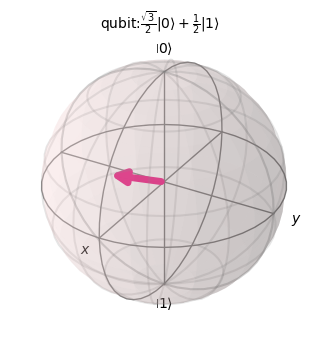

In [78]:
resul =super2polares(z1,z2)
plot_bloch_vector([1, resul[0], resul[1]], coord_type='spherical',
                  title='qubit:$\\frac{\\sqrt{3}}{2}|0\\rangle+\\frac{1}{2}|1\\rangle$',figsize=(3,3))

Igualmente, representemos el qubit $\frac{2}{3}|0\rangle+\frac{1-2i}{3}|1\rangle$

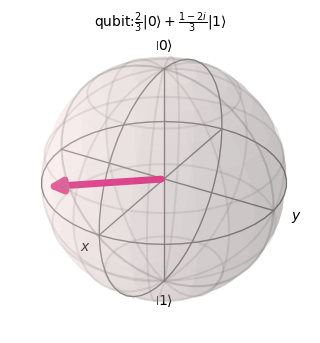

In [79]:
z1=complex(2/3,0)
z2=complex(1/3,-2/3)
resul =super2polares(z1,z2)
plot_bloch_vector([1, resul[0], resul[1]], coord_type='spherical',
                  title='qubit:$\\frac{2}{3}|0\\rangle+\\frac{1-2i}{3}|1\\rangle$',figsize=(3,3))

Es conveniente recordar por lo tanto que un **un qubit es cualquier punto de la esfera de Bloch**.

Como puede verse todo este aparato teórico está fuertemente soportado en base a una estructura donde los números complejos juegan un papel importante, por lo que se ha creído oportuno crear un apartado dedicado en exclusiva a este tipo de números, y dicho capítulo [se puede encontrar en este apartado](complejos).   